# **Proyecto integrador de Machine Learning sobre datos médicos**
## **Creado por Santos Iparraguirre**

## Modelamiento:

In [303]:
# Importación de librerías y carga de datos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import randint
from scipy.stats import uniform

data = pd.read_csv('data1.csv')

In [304]:
# Separación del dataset en X e y

X = data.drop('hospitalizacion', axis=1)
y = data['hospitalizacion']

X

,diabetes_no,diabetes_si,hosp_ultimo_mes_no,hosp_ultimo_mes_si,biopsias_previas_no,biopsias_previas_si,volumen_prostatico_no,volumen_prostatico_si,antibiotico_cefalosporina_aminoglucocido,antibiotico_fluoroquinolona_aminoglicosido,...,agente_no,agente_pseudomonas_aeruginosa,patron_resistencia_ampi_r_cipro_r_genta_r_sulfa_m_r,patron_resistencia_multi_sensible,patron_resistencia_no,patron_resistencia_resistente_ampi_cipro_genta,patron_resistencia_resistente_ampi_sulfa_cefadroxilo_cefuroximo_cipro_cefepime_cefotaxima,edad,psa,num_muestras_tomadas
0,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,53.0,4.00,12.0
1,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,56.0,7.70,12.0
2,True,False,True,False,False,True,False,True,False,True,...,False,False,True,False,False,False,False,57.0,29.00,24.0
3,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,56.0,7.00,12.0
4,True,False,True,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,55.0,29.00,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,75.0,75.00,12.0
443,True,False,True,False,True,False,False,True,False,True,...,True,False,False,False,True,False,False,67.0,6.00,12.0
444,True,False,True,False,True,False,False,True,False,False,...,True,False,False,False,True,False,False,64.0,4.80,12.0
445,True,False,True,False,True,False,True,False,False,True,...,True,False,False,False,True,False,False,69.0,4.43,20.0


In [305]:
y

0      1
1      1
2      1
3      1
4      1
      ..
442    0
443    0
444    0
445    0
446    0
Name: hospitalizacion, Length: 447, dtype: int64

In [306]:
# Partición de datos para entrenamiento

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [307]:
y_train.value_counts()

hospitalizacion
0    317
1     18
Name: count, dtype: int64

### 1) Árbol de decisión

#### Entrenamiento

In [308]:
# Instanciamos la variable del modelo
model = DecisionTreeClassifier(random_state = 2)

# Entrenamos con x_train + y_train
model = model.fit(x_train,y_train)

# Predecimos con x_test
predict = model.predict(x_test)

#### Evaluación

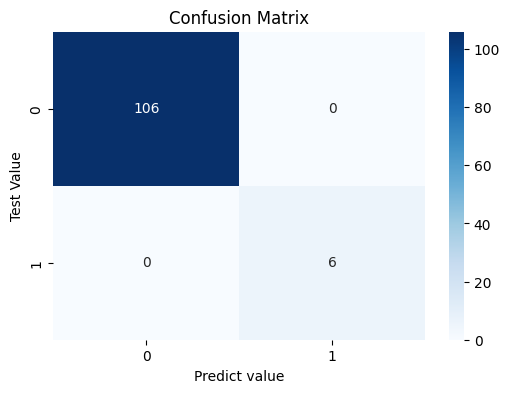

In [309]:
# Creamos la matriz con los resultados de y_test y la predicción del modelo

matrix = confusion_matrix(y_test,predict)

# Graficamos la matriz

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [310]:
# Creamos e imprimimos las medidas comparando los resultados de y_test con las predicciones del modelo

accuracy = accuracy_score(y_test, predict)
precision = precision_score(y_test, predict)
recall = recall_score(y_test, predict)
f1 = f1_score(y_test, predict)
roc_auc = roc_auc_score(y_test, predict)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


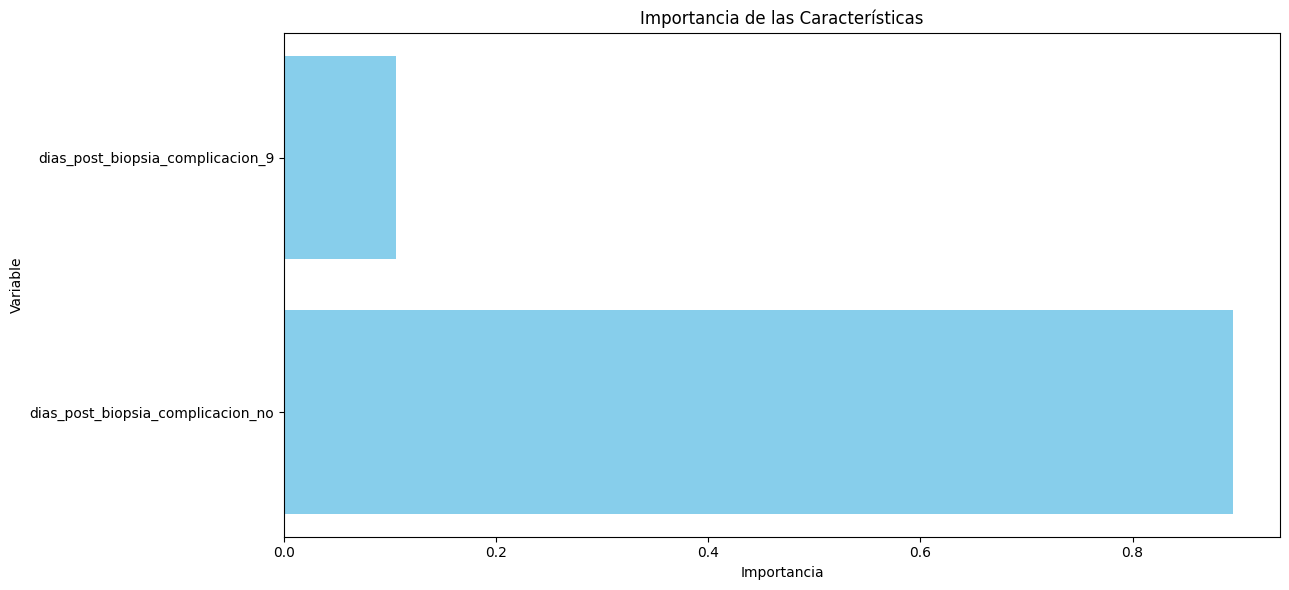

In [311]:
# Declaramos la variable importances, que contendrá la importancia de las características del modelo.

importances = model.feature_importances_

# Creamos la variable 'variables' que contendrá los nombres de las columnas de todas nuestras características.

variables = X.columns

# Creamos un dataframe con las variables y su respectiva importancia

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

# Lo ordenamos por importancia

df = df.sort_values('Importancia', ascending=False)

# Dropeamos las que no tengan importancia en el modelo

df = df[df['Importancia'] != 0]

# Graficamos 
plt.figure(figsize=(13,6))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

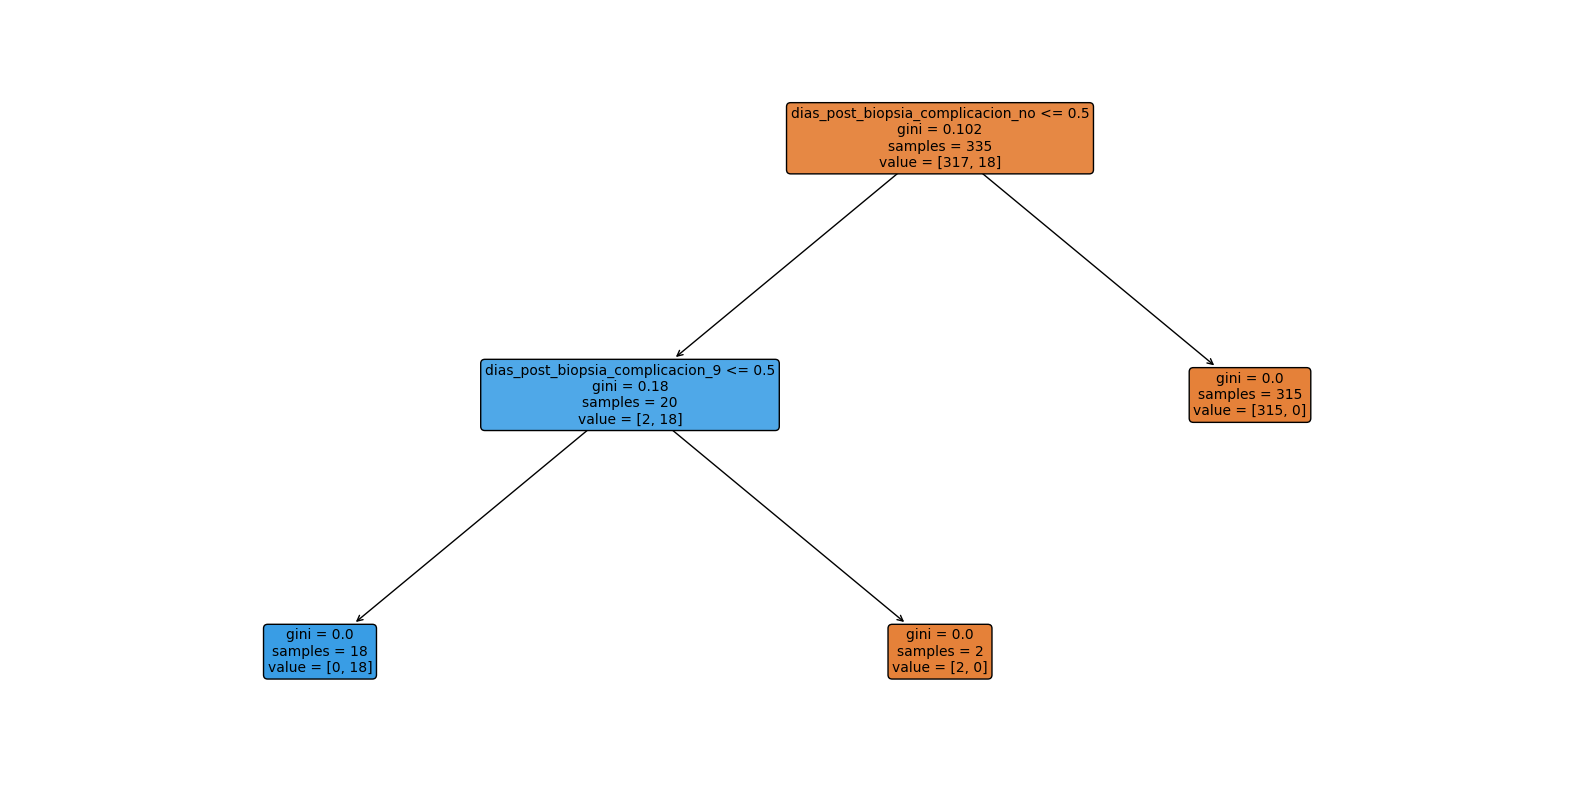

In [312]:
# Graficamos el árbol
plt.figure(figsize=(20,10))

plot_tree(model, feature_names=X.columns, filled=True, rounded=True, fontsize=10)

plt.show()

#### Validación 

In [313]:
parametro = {
    'max_depth': randint(1,12)
}

model_1 = DecisionTreeClassifier(random_state=2)

busqueda = RandomizedSearchCV(model_1, parametro, n_iter=60, scoring='f1', cv=6, random_state=1)

busqueda.fit(x_train, y_train)

print('Mejor hiperparámetro:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)

Mejor hiperparámetro: {'max_depth': 6}
Rendimiento del modelo: 1.0


In [314]:
model1 = DecisionTreeClassifier(max_depth=6, random_state=2)

model1 = model1.fit(x_train,y_train)

predict1 = model1.predict(x_test)

In [315]:
accuracy = accuracy_score(y_test, predict1)
precision = precision_score(y_test, predict1)
recall = recall_score(y_test, predict1)
f1 = f1_score(y_test, predict1)
roc_auc = roc_auc_score(y_test, predict1)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


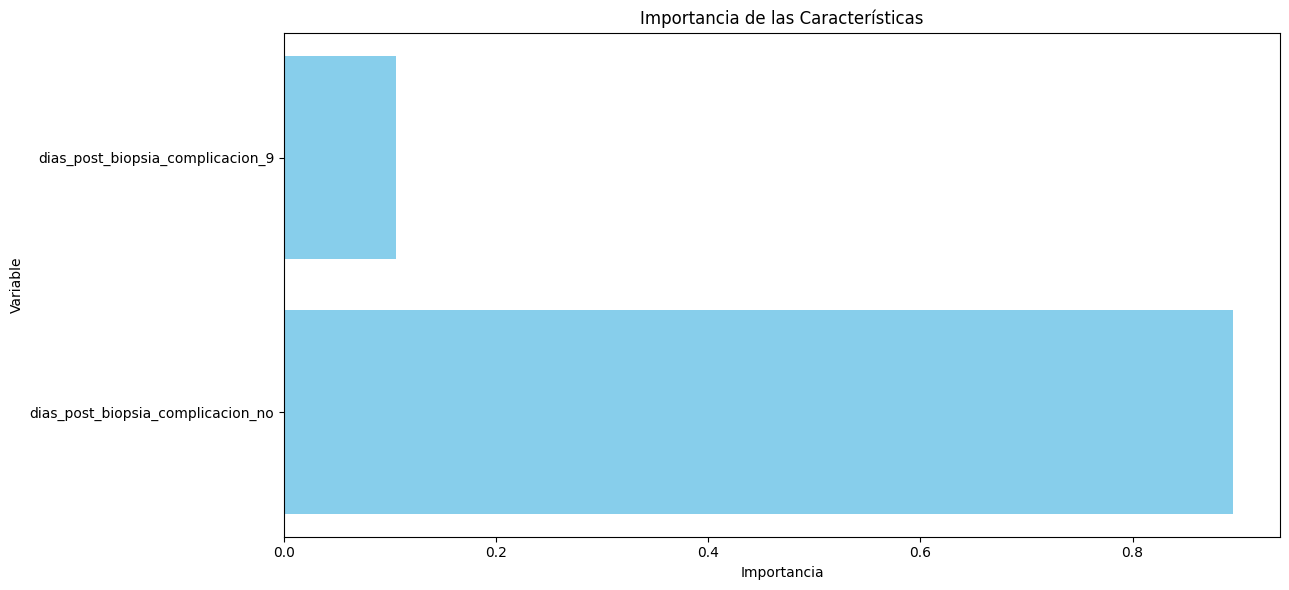

In [316]:
importances = model1.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)

df = df[df['Importancia'] != 0]

 
plt.figure(figsize=(13,6))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

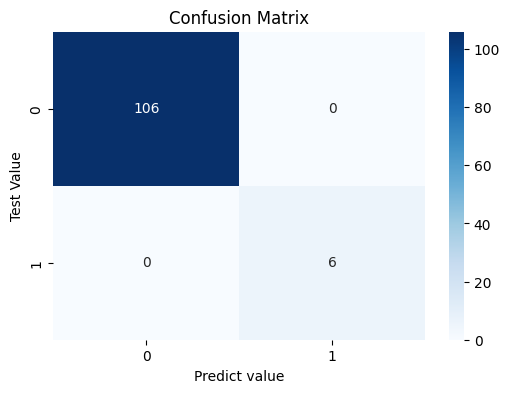

In [317]:
matrix = confusion_matrix(y_test,predict1)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

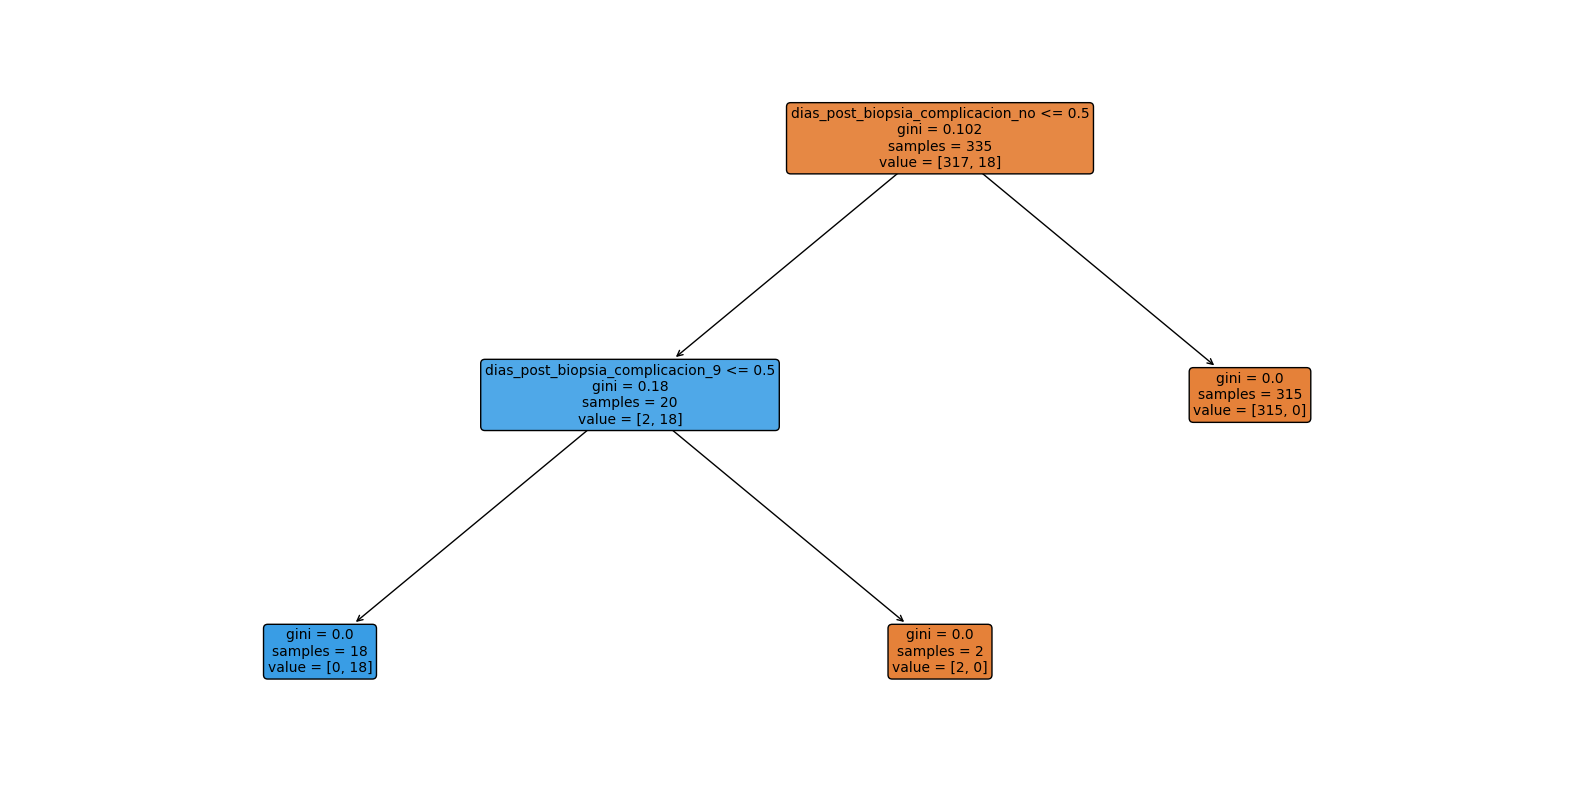

In [318]:
plt.figure(figsize=(20,10))

plot_tree(model1, feature_names=X.columns, filled=True, rounded=True, fontsize=10)

plt.show()

#### Conclusión sobre el modelo: 

Es muy efectivo a la hora de predecir con esta partición de los datos, pero su manera de decidir está muy ligada a una sola variable, por lo que no parece confiable.

### 2) K-Vecinos

#### Entrenamiento

In [319]:
knn = KNeighborsClassifier()

knn = knn.fit(x_train,y_train)

knnpredict = knn.predict(x_test)

#### Evaluación

In [320]:
accuracy = accuracy_score(y_test, knnpredict)
precision = precision_score(y_test, knnpredict)
recall = recall_score(y_test, knnpredict)
f1 = f1_score(y_test, knnpredict)
roc_auc = roc_auc_score(y_test, knnpredict)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 0.955
Precision: 1.0
Recall: 0.167
F1: 0.286
ROC-AUC: 0.583


#### Validación

In [273]:
parametro = {
    'n_neighbors': randint(1,10)
}

knnparameter = KNeighborsClassifier()

# Nos centramos en la medida recall ya que es muy importante no tener falsos negativos en este caso

busqueda = RandomizedSearchCV(knnparameter, parametro, n_iter=60, cv=6, scoring='recall', random_state=1)

busqueda.fit(x_train, y_train)

print('Mejor hiperparámetro:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)

Mejor hiperparámetro: {'n_neighbors': 1}
Rendimiento del modelo: 0.8333333333333334


In [321]:
knn = KNeighborsClassifier(n_neighbors=1)

knn = knn.fit(x_train,y_train)

knnpredict = knn.predict(x_test)

In [322]:
accuracy = accuracy_score(y_test, knnpredict)
precision = precision_score(y_test, knnpredict)
recall = recall_score(y_test, knnpredict)
f1 = f1_score(y_test, knnpredict)
roc_auc = roc_auc_score(y_test, knnpredict)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 0.991
Precision: 1.0
Recall: 0.833
F1: 0.909
ROC-AUC: 0.917


#### Conclusión del modelo:

Lo probamos por recomendación pero sabemos que no es adecuado para los datos y objetivos que manejamos.

### 3) Bosque Aleatorio

In [323]:
forest = RandomForestClassifier()

forest.fit(x_train,y_train)

predictforest = forest.predict(x_test)

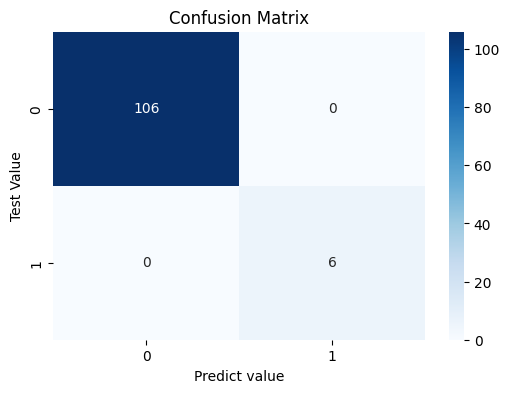

In [324]:
matrix = confusion_matrix(y_test,predictforest)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [325]:
accuracy = accuracy_score(y_test, predictforest)
precision = precision_score(y_test, predictforest)
recall = recall_score(y_test, predictforest)
f1 = f1_score(y_test, predictforest)
roc_auc = roc_auc_score(y_test, predictforest)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


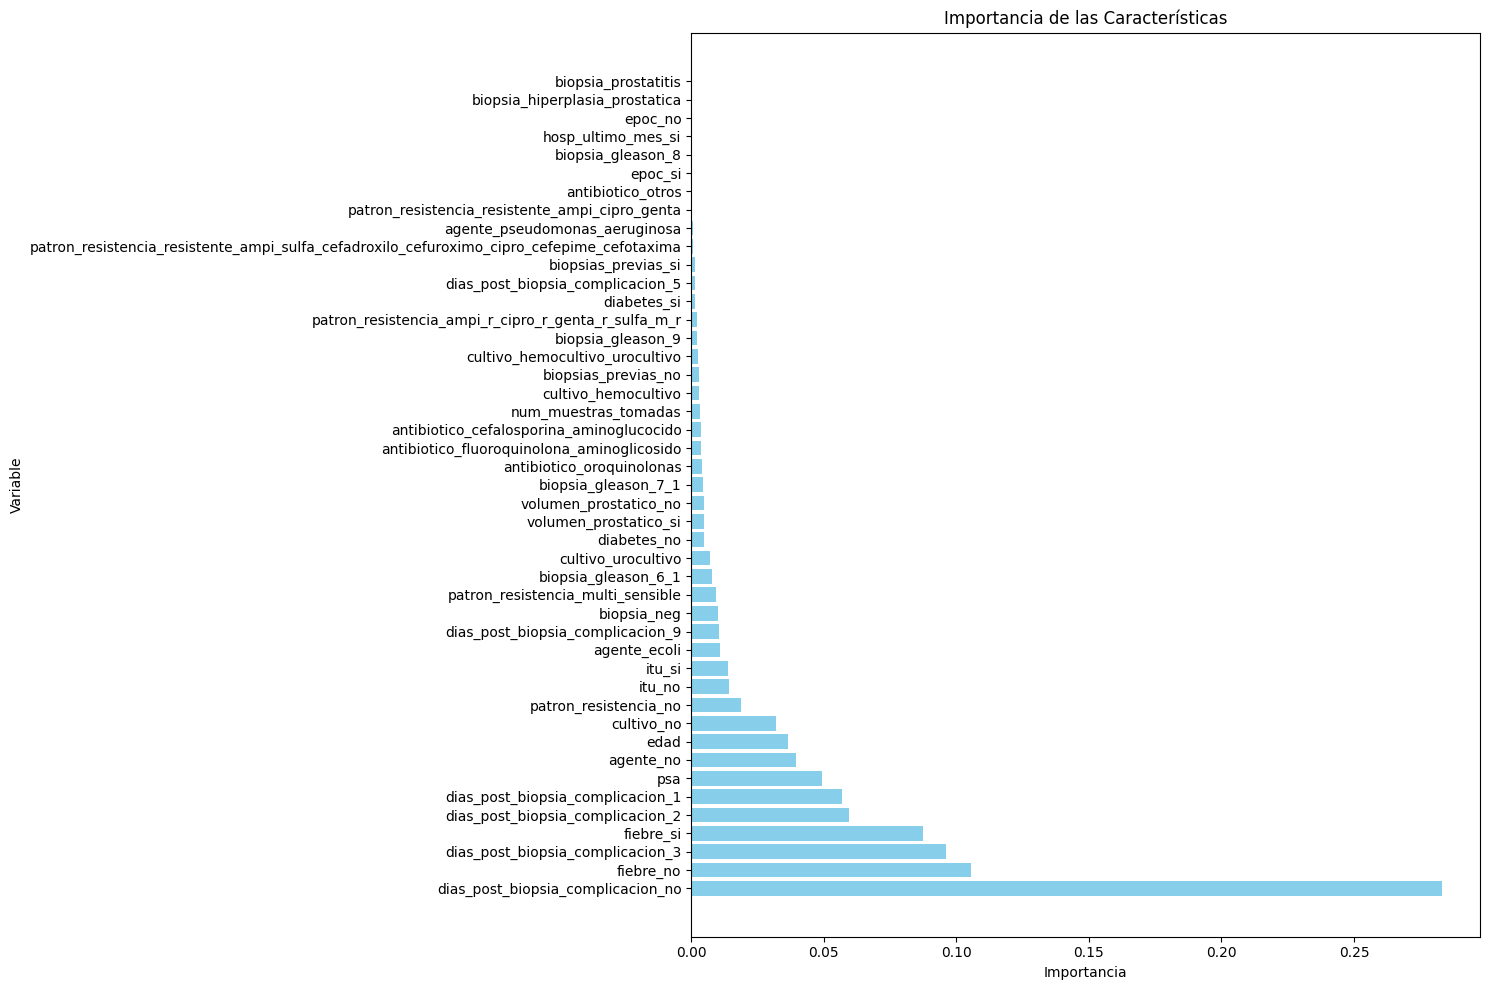

In [326]:
importances = forest.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)

df = df[df['Importancia'] > 0]

 
plt.figure(figsize=(15,10))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [284]:
parametros = { 
    'n_estimators': randint(1, 200),     # Número de árboles en el bosque
    'max_depth': randint(1, 20),         # Profundidad máxima de cada árbol
    'min_samples_split': randint(2, 20), # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 20),  # Número mínimo de muestras requeridas en cada hoja del árbol
    'bootstrap': [True, False]           # Método de muestreo para construir árboles
}


busqueda = RandomizedSearchCV(estimator=forest, param_distributions=parametros, n_iter=50, cv=5, scoring='f1', random_state=1)

busqueda.fit(x_train, y_train)

print('Mejores hiperparámetros:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)

Mejores hiperparámetros: {'bootstrap': False, 'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 97}
Rendimiento del modelo: 1.0


In [327]:
forest = RandomForestClassifier(bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=9, n_estimators=97)

forest.fit(x_train,y_train)

predictforest = forest.predict(x_test)

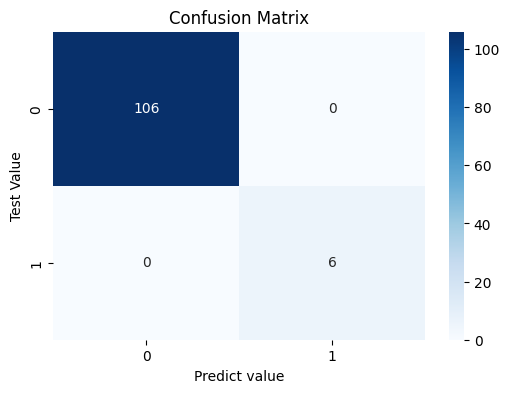

In [328]:
matrix = confusion_matrix(y_test,predictforest)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [329]:
accuracy = accuracy_score(y_test, predictforest)
precision = precision_score(y_test, predictforest)
recall = recall_score(y_test, predictforest)
f1 = f1_score(y_test, predictforest)
roc_auc = roc_auc_score(y_test, predictforest)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


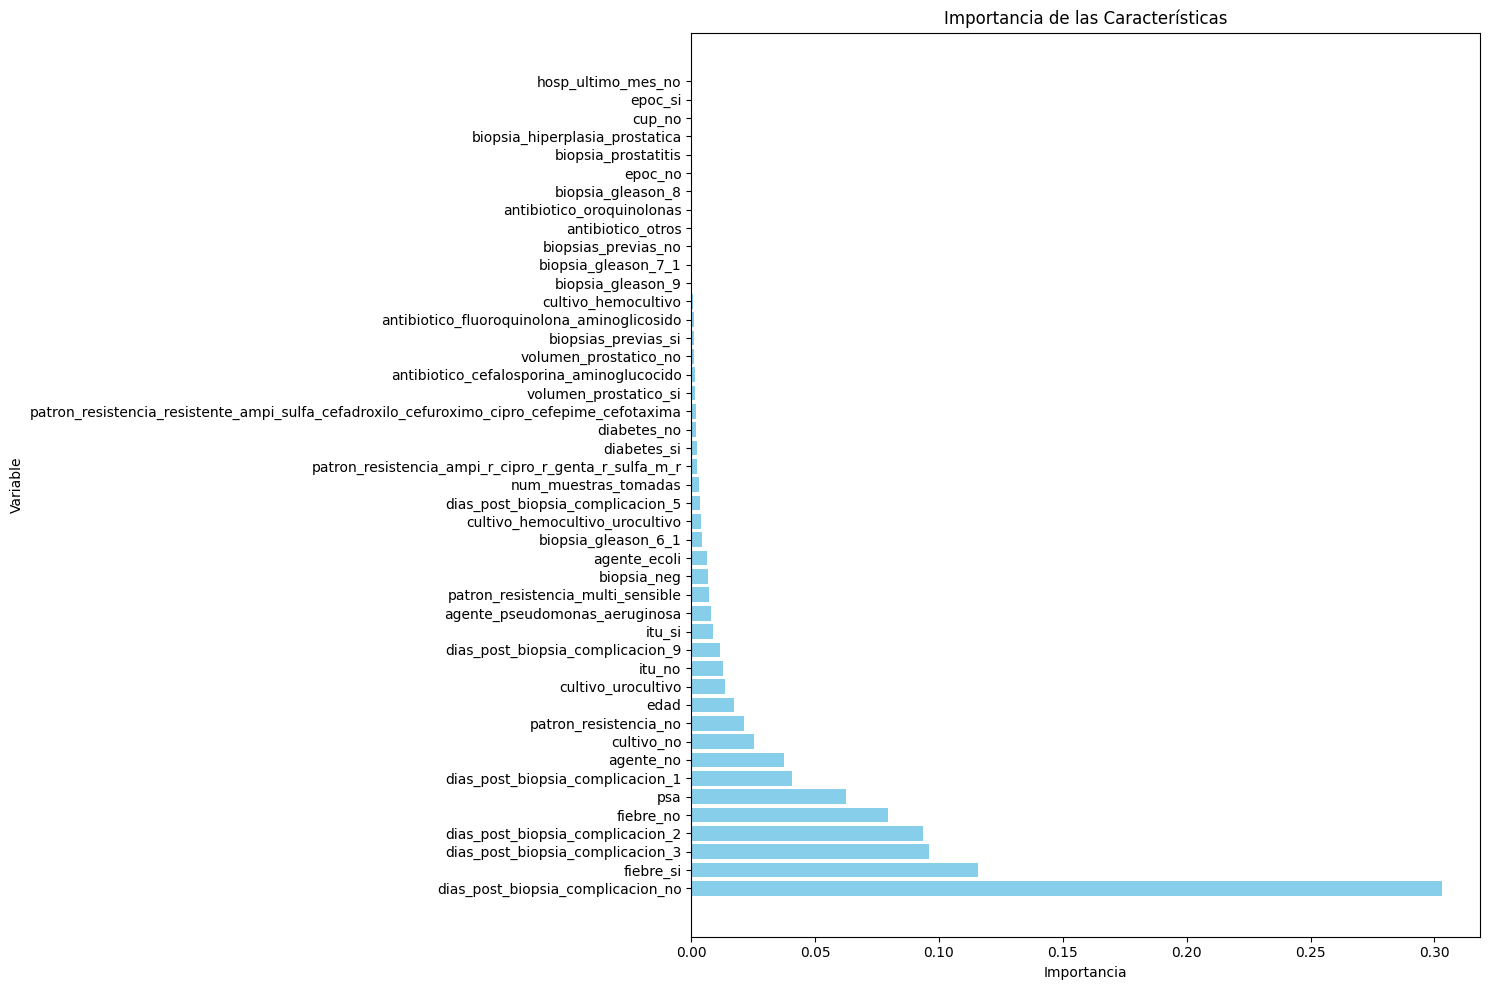

In [330]:
importances = forest.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)

df = df[df['Importancia'] > 0]

 
plt.figure(figsize=(15,10))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [332]:
forest = RandomForestClassifier(bootstrap=False, max_depth=11, min_samples_leaf=1, min_samples_split=9, n_estimators=97, class_weight={0:1,1:16})

forest.fit(x_train,y_train)

predictforest = forest.predict(x_test)

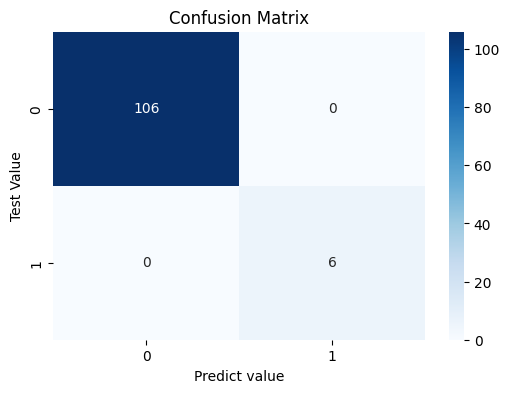

In [333]:
matrix = confusion_matrix(y_test,predictforest)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

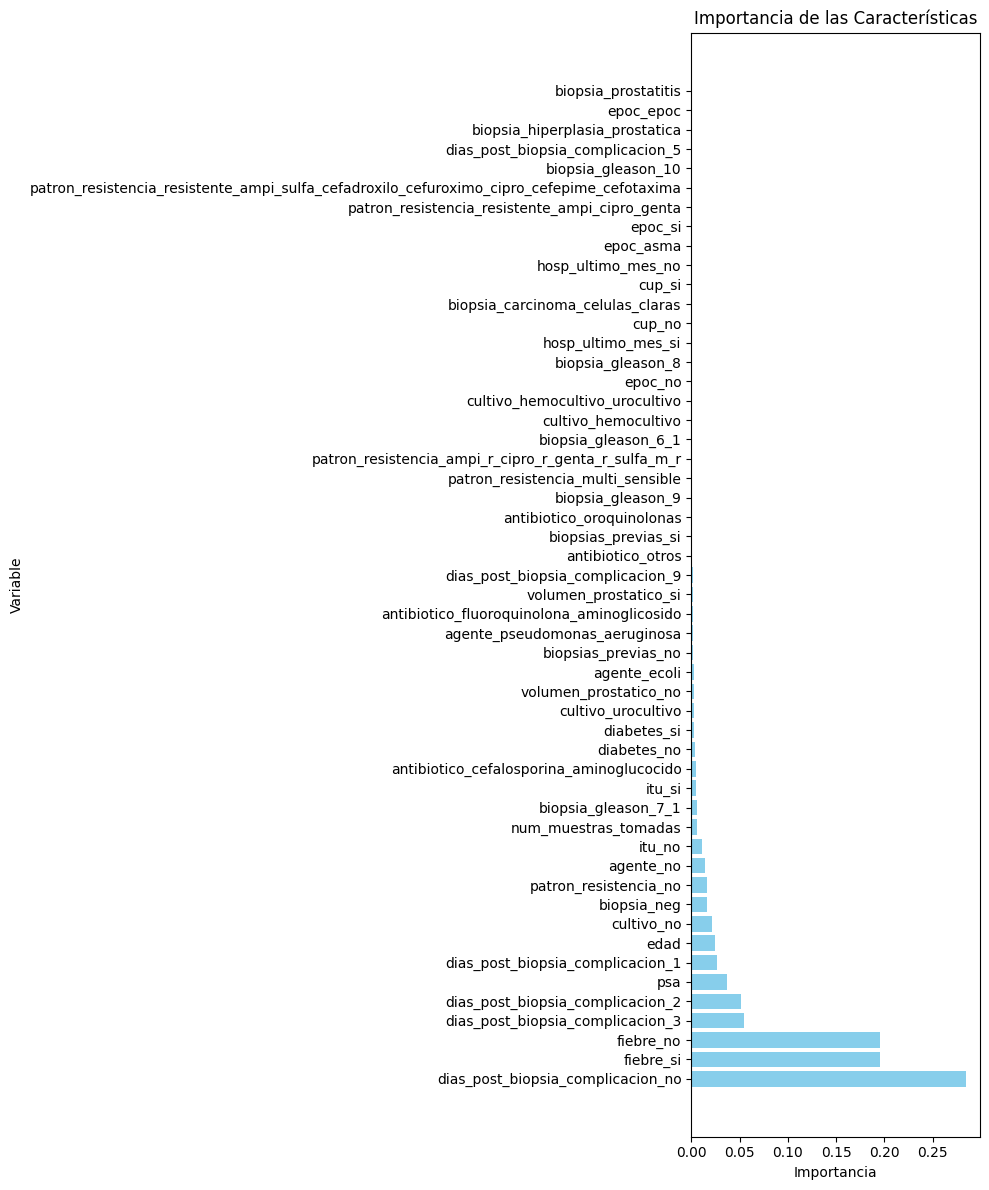

In [334]:
importances = forest.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)
plt.figure(figsize=(10,12))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [34]:
accuracy = accuracy_score(y_test, predictforest)
precision = precision_score(y_test, predictforest)
recall = recall_score(y_test, predictforest)
f1 = f1_score(y_test, predictforest)
roc_auc = roc_auc_score(y_test, predictforest)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=45)

In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=4)

x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [37]:
'''boostmodel = xgb.XGBClassifier()


parametros = {
 'n_estimators': randint(100, 1000),  # Número de árboles en el bosque
    'max_depth': randint(3, 15),  # Profundidad máxima del árbol
    'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
    'min_child_weight': randint(1, 10),  # Peso mínimo de la hoja del árbol
    'subsample': uniform(0.5, 0.5),  # Proporción de instancias de entrenamiento para cada árbol
    'colsample_bytree': uniform(0.5, 0.5),  # Proporción de características para cada árbol
    'scale_pos_weight': uniform(1, 5)  # Peso de la clase positiva para equilibrar datos desbalanceados
}


busqueda = RandomizedSearchCV(estimator=boostmodel, param_distributions=parametros, n_iter=100, cv=10, scoring='recall', random_state=1)

busqueda.fit(x_train, y_train)

print('Mejores hiperparámetros:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)'''

Mejores hiperparámetros: {'colsample_bytree': 0.6939553705810038, 'learning_rate': 0.210923811041044, 'max_depth': 12, 'min_child_weight': 3, 'n_estimators': 376, 'scale_pos_weight': 3.095972572016474, 'subsample': 0.8426097501983798}
Rendimiento del modelo: 1.0


In [38]:
boostmodel = xgb.XGBClassifier(coolsample_bytree = 0.723, learning_rate = 0.766, max_depth = 12, min_child_weight = 9, n_estimators = 122, scale_pos_weight = 5.542, subsample = 0.646)

boostmodel.fit(x_train, y_train)

predictboost = boostmodel.predict(x_test)

c:\Users\santo\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [14:58:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "coolsample_bytree" } are not used.

  warnings.warn(smsg, UserWarning)


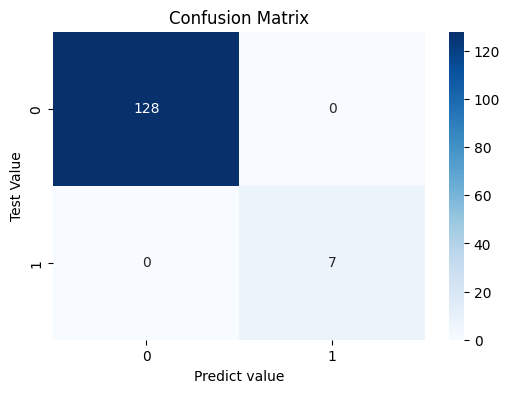

In [39]:
matrix = confusion_matrix(y_test,predictboost)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

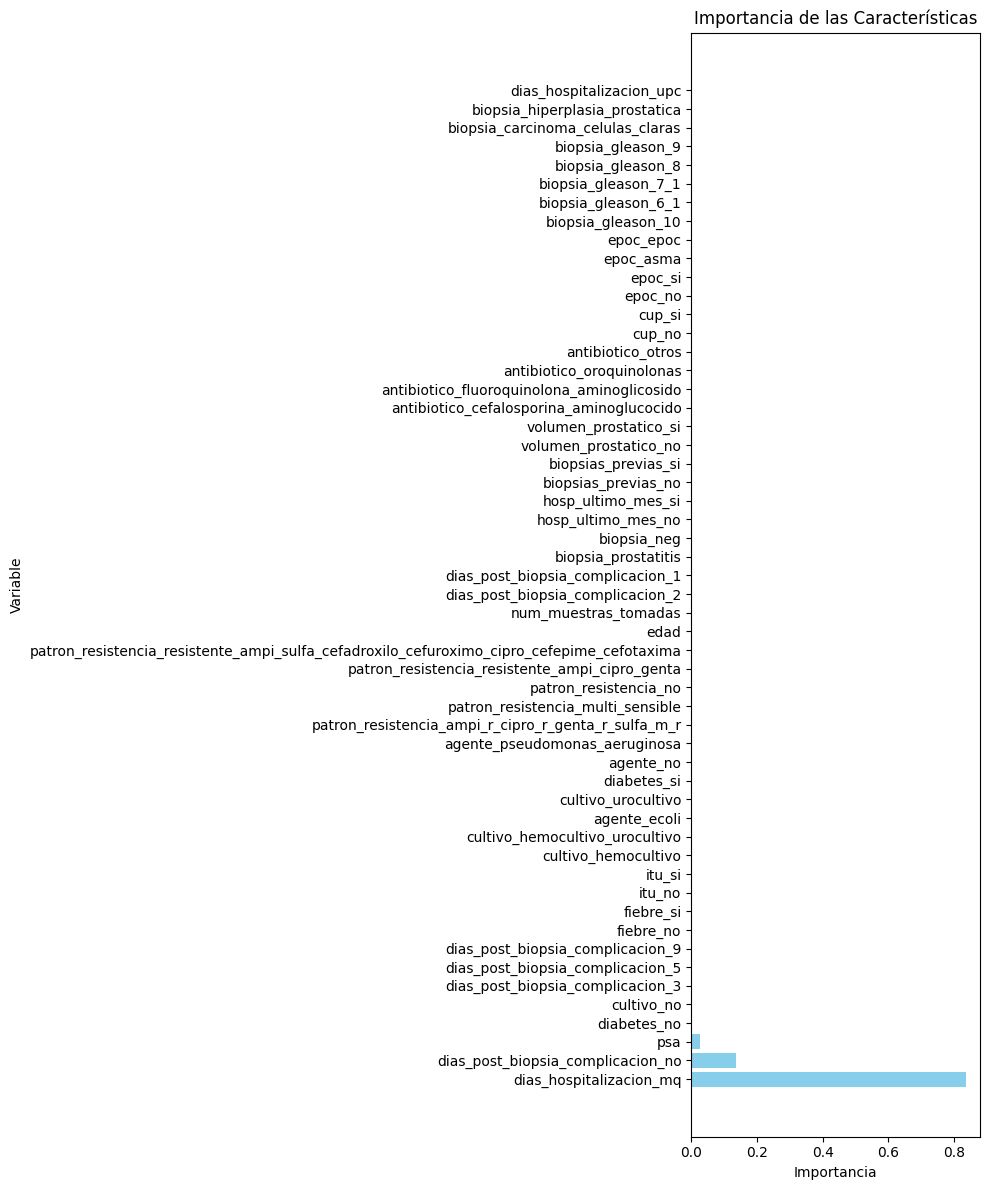

In [40]:
importances = boostmodel.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)
plt.figure(figsize=(10,12))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [41]:
'''boostmodel2 = xgb.XGBClassifier()

parametros = {
    'n_estimators': randint(100, 1000),  # Número de árboles en el bosque
    'max_depth': randint(3, 15),  # Profundidad máxima del árbol
    'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
    'min_child_weight': randint(1, 10),  # Peso mínimo de la hoja del árbol
    'subsample': uniform(0.5, 0.5),  # Proporción de instancias de entrenamiento para cada árbol
    'scale_pos_weight': uniform(1, 5)  # Peso de la clase positiva para equilibrar datos desbalanceados
}


busqueda = RandomizedSearchCV(estimator=boostmodel2, param_distributions=parametros, n_iter=100, cv=10, scoring='f1', random_state=1)

busqueda.fit(x_train, y_train)

print('Mejores hiperparámetros:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)'''

Mejores hiperparámetros: {'learning_rate': 0.1263732223486022, 'max_depth': 9, 'min_child_weight': 3, 'n_estimators': 376, 'scale_pos_weight': 3.095972572016474, 'subsample': 0.8426097501983798}
Rendimiento del modelo: 1.0


In [42]:
boostmodel2 = xgb.XGBClassifier(learning_rate = 0.04834209983233109, max_depth = 9, min_child_weight = 5, n_estimators = 365, scale_pos_weight = 2.5718830805702524, subsample = 0.5873829381781558)

boostmodel2.fit(x_train, y_train)

predictboost2 = boostmodel2.predict(x_test)

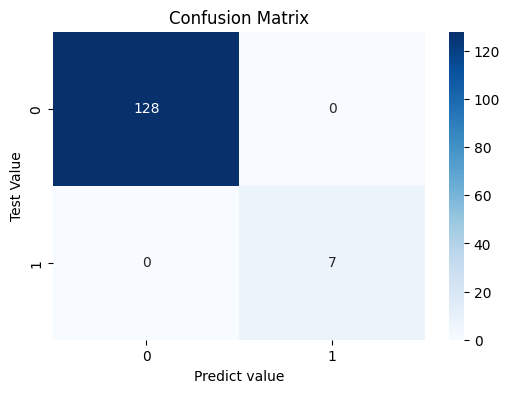

In [43]:
matrix = confusion_matrix(y_test,predictboost2)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

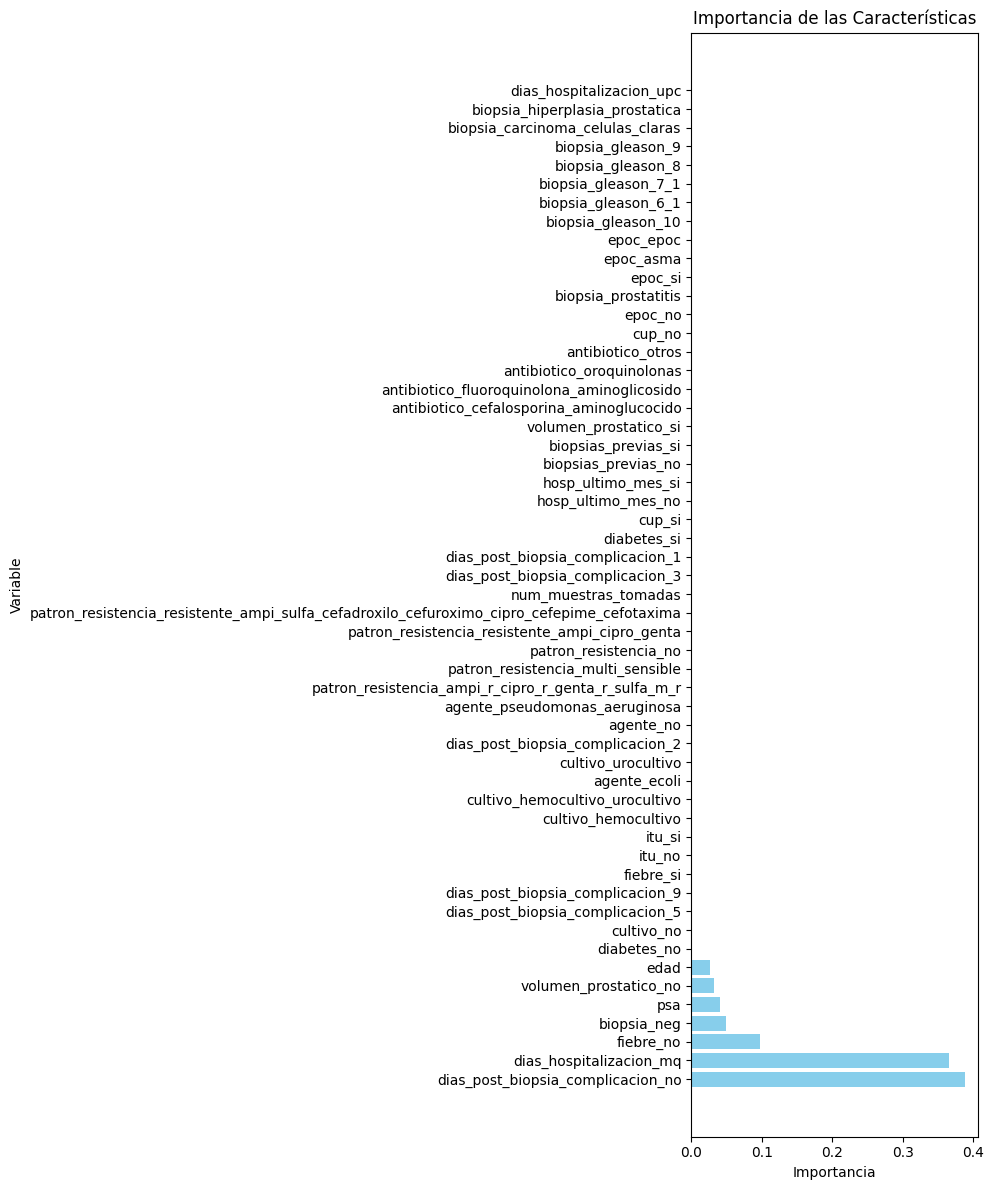

In [44]:
importances = boostmodel2.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)
plt.figure(figsize=(10,12))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [45]:
'''boostmodel3 = xgb.XGBClassifier()

parametros = {
    'n_estimators': randint(100, 1000),  # Número de árboles en el bosque
    'max_depth': randint(3, 15),  # Profundidad máxima del árbol
    'learning_rate': uniform(0.01, 0.3),  # Tasa de aprendizaje
    'min_child_weight': randint(1, 10),  # Peso mínimo de la hoja del árbol
    'subsample': uniform(0.5, 0.5),  # Proporción de instancias de entrenamiento para cada árbol
    'scale_pos_weight': uniform(1, 5)  # Peso de la clase positiva para equilibrar datos desbalanceados
}


busqueda = RandomizedSearchCV(estimator=boostmodel3, param_distributions=parametros, n_iter=100, cv=10, scoring='f1', random_state=1)

busqueda.fit(x_train_resampled, y_train_resampled)

print('Mejores hiperparámetros:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)'''

Mejores hiperparámetros: {'learning_rate': 0.13510660141077221, 'max_depth': 11, 'min_child_weight': 6, 'n_estimators': 947, 'scale_pos_weight': 2.18044488475988, 'subsample': 0.6982903636480131}
Rendimiento del modelo: 1.0


In [46]:
boostmodel3 = xgb.XGBClassifier(learning_rate=0.072, max_depth=14, min_child_weight=3, n_estimators=299, scale_pos_weight=1.86, subsample=0.698)

boostmodel3.fit(x_train_resampled,y_train_resampled)

predictboost3 = boostmodel3.predict(x_test)

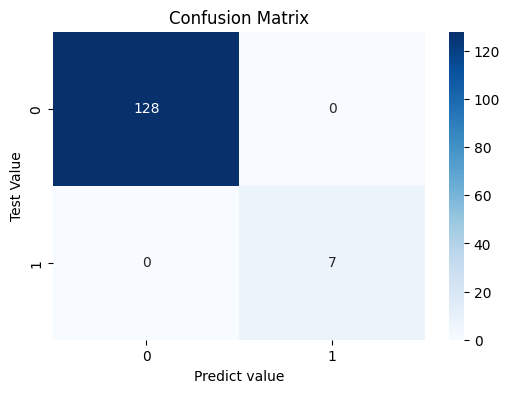

In [47]:
matrix = confusion_matrix(y_test,predictboost3)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

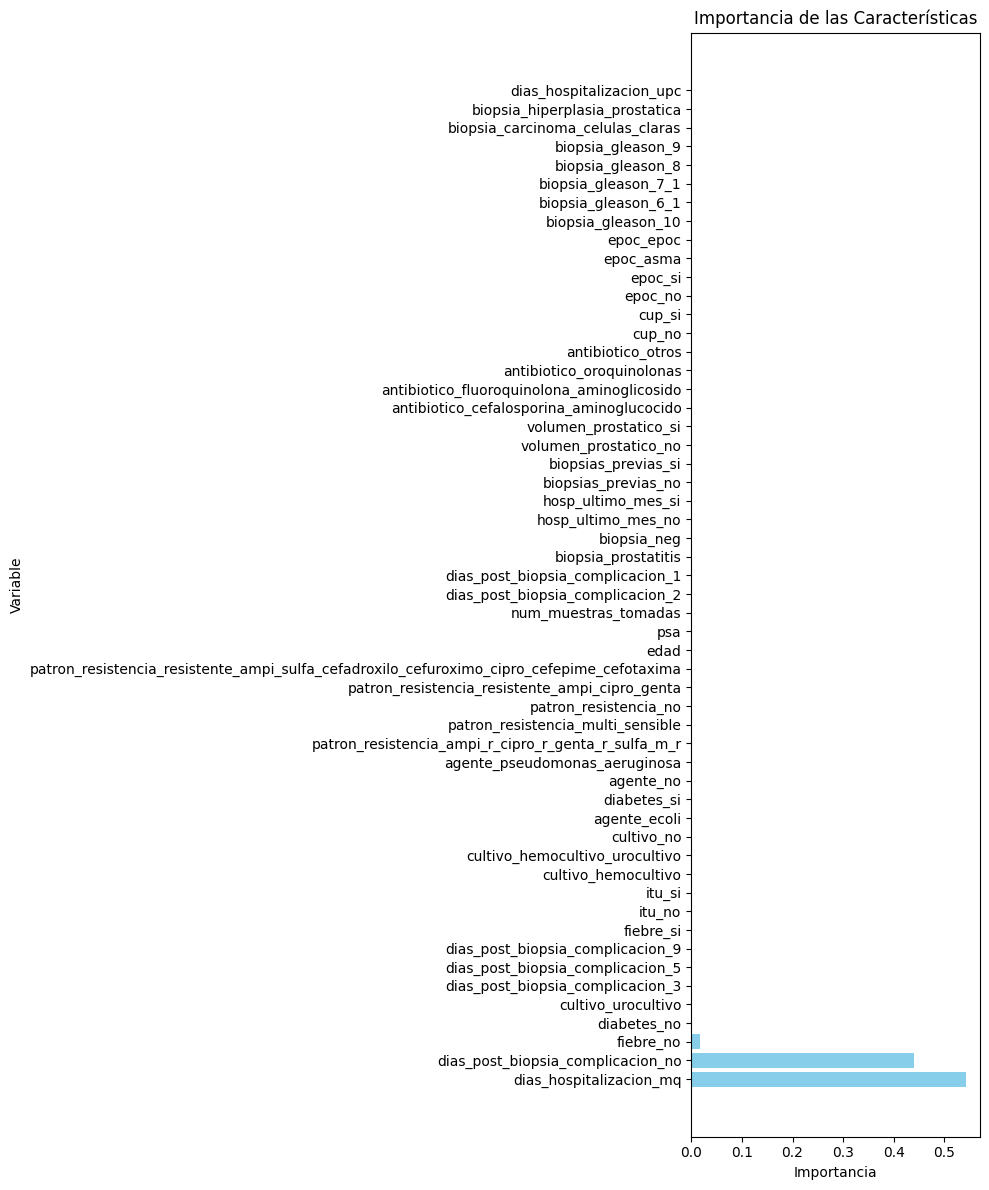

In [48]:
importances = boostmodel3.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)
plt.figure(figsize=(10,12))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [49]:
forest = RandomForestClassifier(bootstrap=False, max_depth=9, min_samples_leaf=10, min_samples_split=13, n_estimators=134)

forest.fit(x_train_resampled,y_train_resampled)

predictforest = forest.predict(x_test)

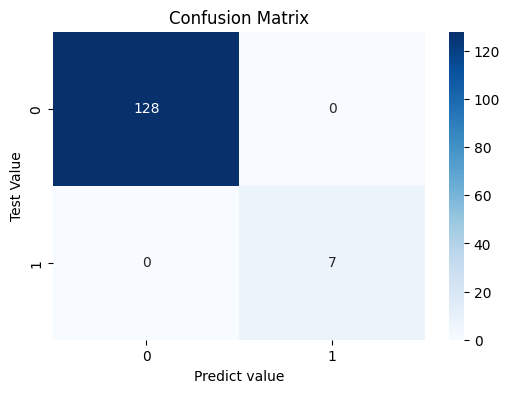

In [50]:
matrix = confusion_matrix(y_test,predictforest)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [51]:
accuracy = accuracy_score(y_test, predictforest)
precision = precision_score(y_test, predictforest)
recall = recall_score(y_test, predictforest)
f1 = f1_score(y_test, predictforest)
roc_auc = roc_auc_score(y_test, predictforest)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


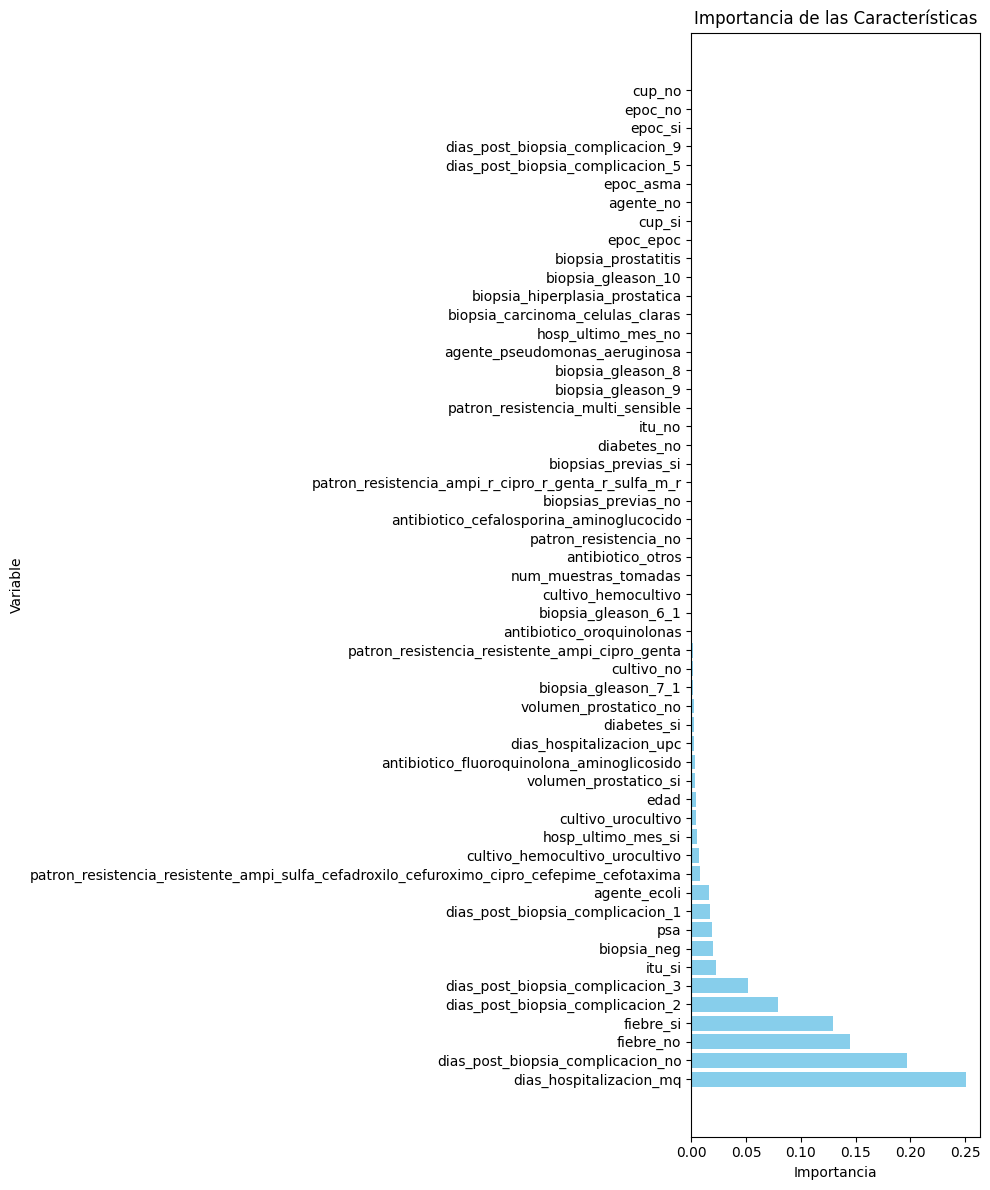

In [52]:
importances = forest.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)
plt.figure(figsize=(10,12))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [53]:
tree = DecisionTreeClassifier(max_depth=7, random_state=2)

tree = tree.fit(x_train_resampled,y_train_resampled)

predicttree = tree.predict(x_test)

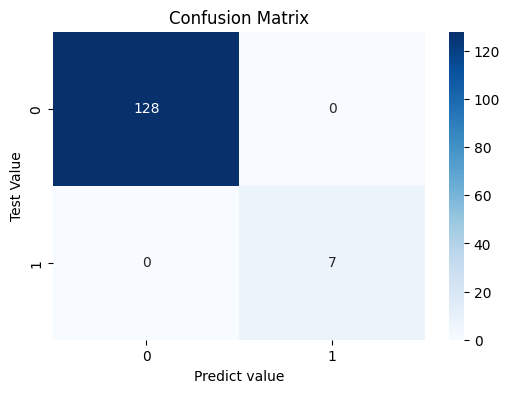

In [54]:
matrix = confusion_matrix(y_test,predicttree)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

In [55]:
'''parametros = {
    'max_depth': randint(1, 20),  # Profundidad máxima del árbol
    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': randint(1, 20),  # Número mínimo de muestras requeridas en cada hoja del árbol
    'criterion': ['gini', 'entropy']  # Criterio para medir la calidad de la división
}


busqueda = RandomizedSearchCV(estimator=tree, param_distributions=parametros, n_iter=75, cv=10, scoring='f1', random_state=1)

busqueda.fit(x_train_resampled, y_train_resampled)

print('Mejores hiperparámetros:', busqueda.best_params_)

rendimiento = busqueda.score(x_test,y_test)
print('Rendimiento del modelo:', rendimiento)'''

"parametros = {\n    'max_depth': randint(1, 20),  # Profundidad máxima del árbol\n    'min_samples_split': randint(2, 20),  # Número mínimo de muestras requeridas para dividir un nodo interno\n    'min_samples_leaf': randint(1, 20),  # Número mínimo de muestras requeridas en cada hoja del árbol\n    'criterion': ['gini', 'entropy']  # Criterio para medir la calidad de la división\n}\n\n\nbusqueda = RandomizedSearchCV(estimator=tree, param_distributions=parametros, n_iter=75, cv=10, scoring='f1', random_state=1)\n\nbusqueda.fit(x_train_resampled, y_train_resampled)\n\nprint('Mejores hiperparámetros:', busqueda.best_params_)\n\nrendimiento = busqueda.score(x_test,y_test)\nprint('Rendimiento del modelo:', rendimiento)"

In [56]:
tree = DecisionTreeClassifier(max_depth=19, criterion='entropy', min_samples_leaf=6, min_samples_split=13, random_state=2)

tree = tree.fit(x_train_resampled,y_train_resampled)

predicttree = tree.predict(x_test)

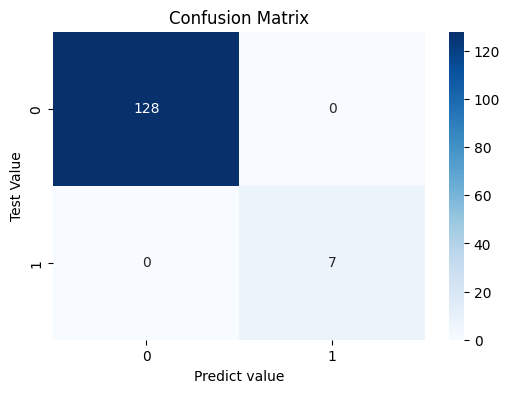

In [57]:
matrix = confusion_matrix(y_test,predicttree)

plt.figure(figsize=(6, 4))
sns.heatmap(matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predict value')
plt.ylabel('Test Value')
plt.title('Confusion Matrix')
plt.show()

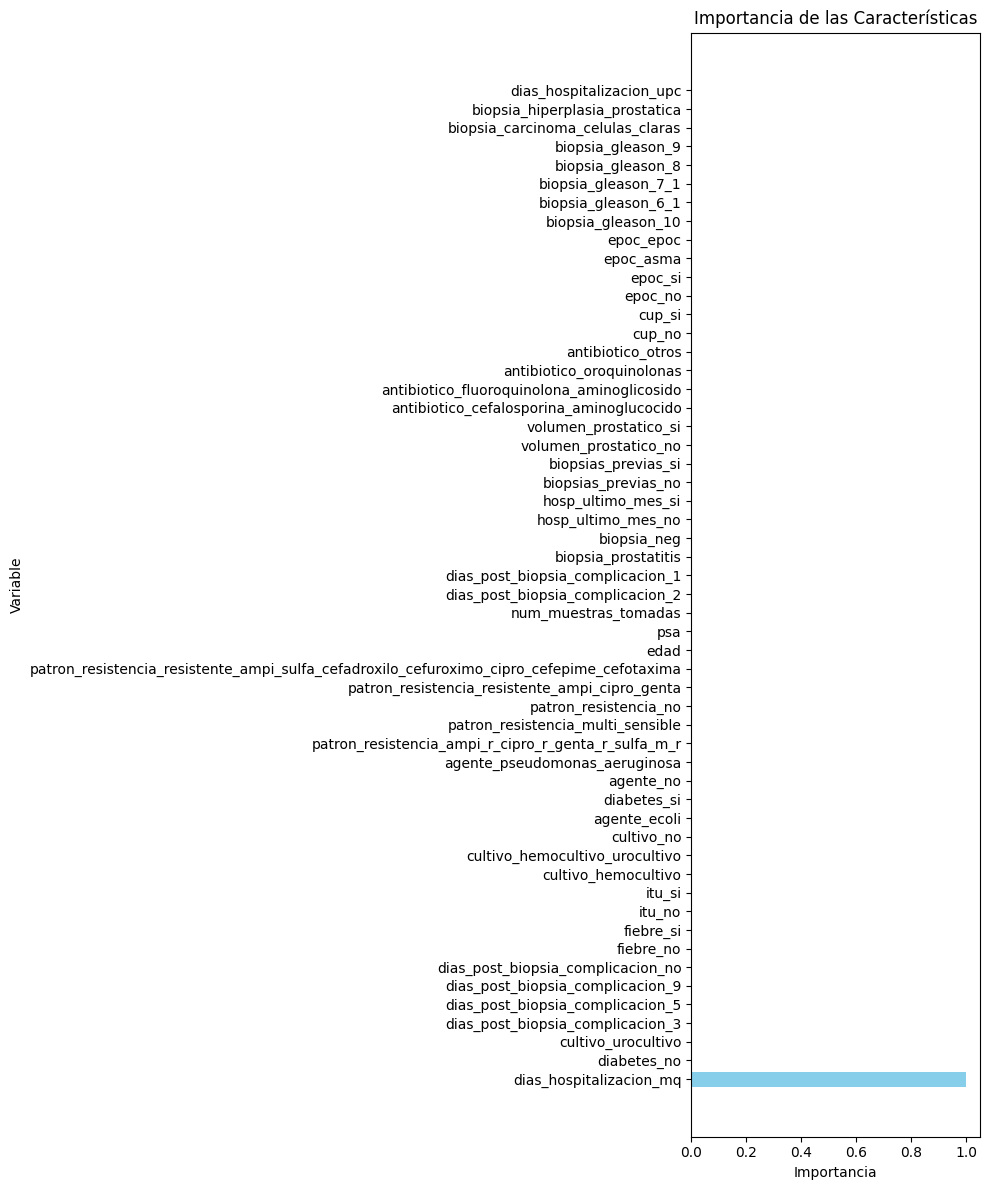

In [58]:
importances = tree.feature_importances_

variables = X.columns

df = pd.DataFrame({'Variable': variables, 'Importancia': importances})

df = df.sort_values('Importancia', ascending=False)
plt.figure(figsize=(10,12))
plt.barh(df['Variable'], df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variable')
plt.title('Importancia de las Características')
plt.tight_layout()
plt.show()

In [59]:
accuracy = accuracy_score(y_test, predicttree)
precision = precision_score(y_test, predicttree)
recall = recall_score(y_test, predicttree)
f1 = f1_score(y_test, predicttree)
roc_auc = roc_auc_score(y_test, predicttree)

print('Accuracy:', round(accuracy,3))
print('Precision:', round(precision,3))
print('Recall:', round(recall,3))
print('F1:', round(f1,3))
print('ROC-AUC:', round(roc_auc,3))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
ROC-AUC: 1.0


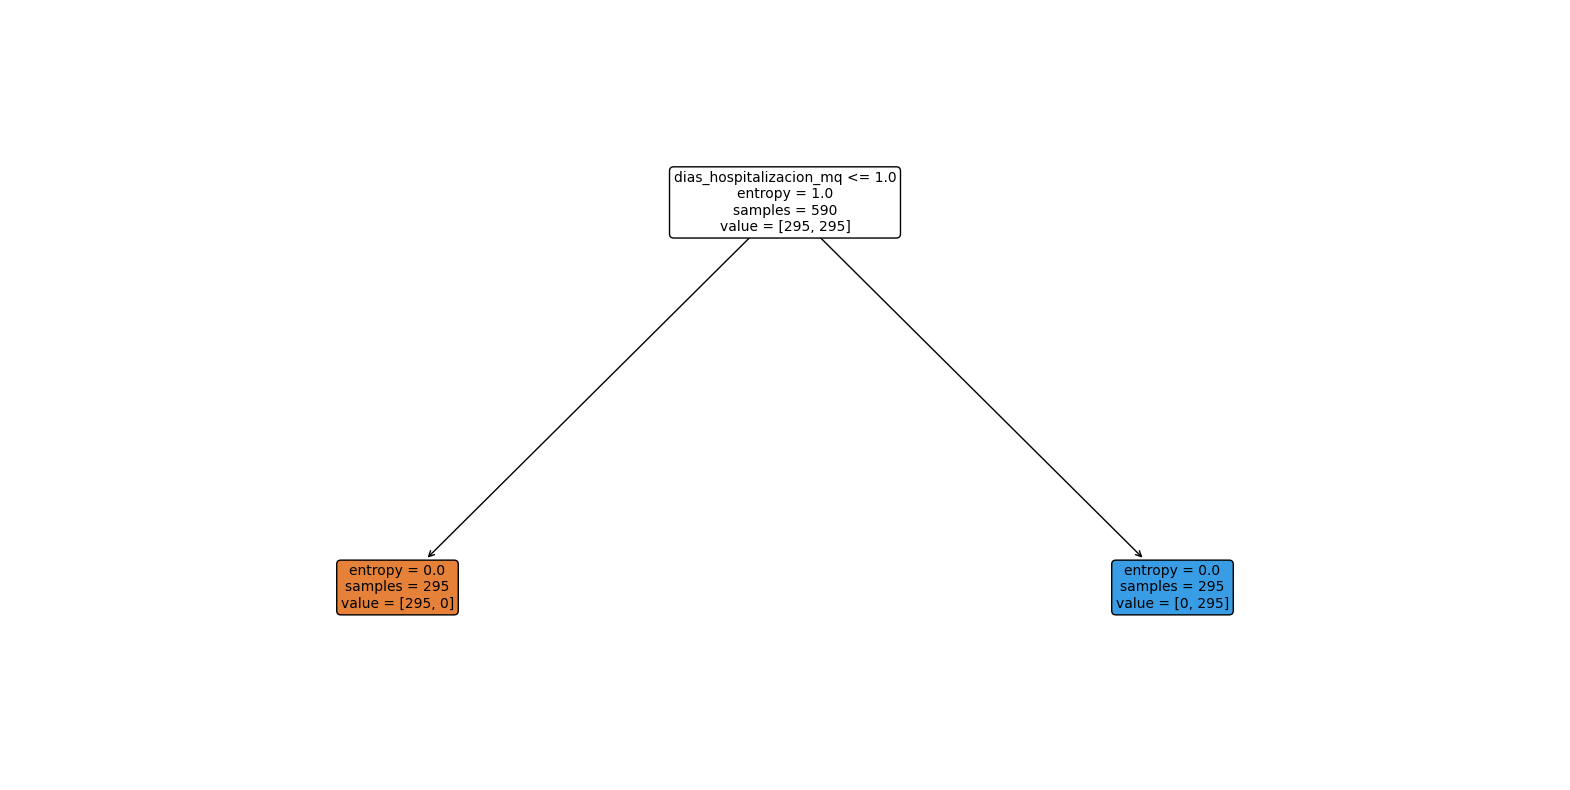

In [60]:
# Crea una figura y ejes para el gráfico
plt.figure(figsize=(20,10))

# Plotea el árbol de decisión
plot_tree(tree, feature_names=X.columns, filled=True, rounded=True, fontsize=10)

# Muestra el gráfico
plt.show()